# Phase 1: Subject Creation

**Description:**

This notebook is to act as the resulting summary file for the creation and upload of subjects for the IceCube Zooniverse project currently called *Name that Neutrino!*. The project is currently being maintained by Elizabeth Warrick (as of March 2023). In this notebook, we take the i3 file and run it through several filters. [note: describe more later].

> Nu Type: NuMu

> Run: 21971

> SubRun: 000000

### Summary Stats:

To be filled in after completing process. Also need to figure out global variables. 

**Subject Set Name:**

In [1]:
#Imports

#My functions: 
from uniformenergydist_filter import *

#General:
import numpy as np
import sys
import os
import subprocess
import argparse
import csv
from tables import *
import pandas as pd
from matplotlib import pyplot as plt
import h5py

#Zooniverse:
from panoptes_client import Panoptes, Project, SubjectSet, Subject
import magic
import glob

#IceCube:
from icecube.icetray import I3Units
import icecube.MuonGun
from icecube import dataio, dataclasses, icetray, MuonGun
from I3Tray import *
from icecube.hdfwriter import I3HDFWriter
from mc_labeler import MCLabeler #make sure that mc_labeler script is in current directory. 

In [2]:
#Specify file paths:

#Initial I3 File:
numu = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/\
launch/Phase1/classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2'

#Desired output directory. Note that creation of this directory is not yet coded and is done manually. 
phase1_dir = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/'

In [3]:
#Run Filter 1 to label MC truth.
filter1(numu,phase1_dir)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/mc_labeler.py:523: UserWarning: Couldn't find OMKey in MCPESeriesMap
  warnings.warn("Couldn't find OMKey in MCPESeriesMap")


Note that the above cell might return an "exception" warning that the *MCPESeriesMap could not be found*. I am unsure why it does that because when I check the i3 file in dataio-shovel, I see the specified mc_pid_series_map (look at mc_labeler.py for exact name of specified key). The resulting file size should be around 400 MB. 

In [4]:
#Path of hdf from above filter.
numu_hdf = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/\
Phase1/mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2.hd5'

In [5]:
#Run uniformenergy_events function which requires hdf from filter 1, 
#number of bins, size of each random choice, and a random seed. 

uniformenergy_events(numu_hdf,25,40,12)

Number of Bins: 25
 Number of Events per Bin: 40
 Total Number of Events: 1000


/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniformenergydist_filter.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['binned_log10E'] = pd.cut(x = np.log10(df_filtered['energy']), bins = bins, labels = labels, include_lowest = True) #might throw an error?


The above function throws another warning about pd.cut, currently that is not a problem but I don't know if a new version of pandas will allow this. 

In [2]:
#Path to Random Events CSV
numu_csv = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/random_events_uniform_energy_distrib_21971.csv'

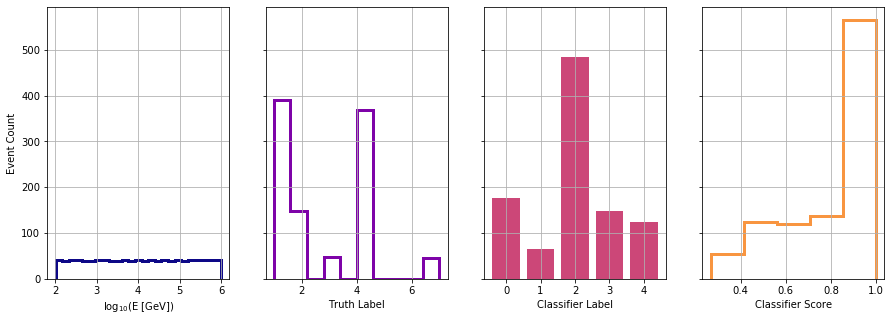

In [7]:
#Run event_characterization_plots function whick makes some quick 
#plots to get an idea of what data you're dealing with.
#Note that I want to update the plot types, maybe make a 2D histogram as Mike K suggested. 
#For truth labels, check out enums.py or in the .py file that holds the functions.

event_characterization_plots(numu_csv)

Now that we have the events for this phase chosen, we run the second filter to pick out only those events. 

In [8]:
#Path to i3 file from filter1 with MC truth labels. 
numu_filter1 = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/\
launch/Phase1/mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2'

In [9]:
#Run function to perform second filter which passes through only selected event IDs chosen from 
#the uniformenergy_events function. 
filter2(numu_filter1,phase1_dir,numu_csv)

In [3]:
#Path to i3 file from filter 2 that holds only specified events. 
numu_filter2 = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2'

In [4]:
#Run function to perform third filter, which returns only the DAQ frames of the specified events.
#DAQ only file is then split up into many smaller i3 files since SteamShovel can't handle making videos of large
#i3 files at one time. Size limit is approx 2E6 MB (? unsure of units)
filter3(numu_filter2,21971,phase1_dir)

daq_21971
/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971/


In [5]:
#Path to NuMu Daq Only folder
numu_daq = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_21971/'

In [6]:
get_steamshovel(numu_daq)

Finished Videos in: daq_only-0015_uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2
Finished Videos in: daq_only-0012_uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2
Finished Videos in: daq_only-0014_uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2
Finished Videos in: daq_only-0018_uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2
Finished Videos in: daq_only-0023_uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2
Finished Videos in: daq_only-0025_uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2
Finished Videos in: daq_only-0008_uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2
Finished Videos in: daq_only-0000_uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2
Finished Videos in: daq_only-0002_uniform_energy_mc_labeled_classifier_DST_IC86.2020_NuMu.021971.000000.i3.bz2
F

Ideas for Compression:
- Use GUI to add files to queue and send to one compression folder.
- Add a subprocess line in movie script to compress the video after making it and direct it to save in the compression folder. 

In [3]:
compression_path = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_21971000/'

In [4]:
get_manifest(compression_path,numu_csv)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniformenergydist_filter.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_manifest = s3.to_dict('dict')


{'/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_21971000/compressed_run_21971_event_10516_origidx_5_RF22.mp4': {'event': 10516,
  'run': 21971,
  'truth_classification': 2,
  'pred_skim': 2.6975624223268824e-07,
  'pred_cascade': 5.884553047508234e-06,
  'pred_tgtrack': 7.236298529278429e-07,
  'pred_starttrack': 0.999993085861206,
  'pred_stoptrack': 1.2755216438620211e-08,
  'energy': 283193.047491327,
  'zenith': 1.388414208211686,
  'oneweight': 4876933132759580.0,
  'truth_classification_label': 'starting_track',
  'max_score_val': 0.999993085861206,
  'idx_max_score': 'pred_starttrack',
  'binned_log10E': 22},
 '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_21971000/compressed_run_21971_event_8285_origidx_23_RF22.mp4': {'event': 8285,
  'run': 21971,
  'truth_classification': 3,
  'pred_skim': 0.0002834929910022,
  'pred_cascade': 1.5358009477495216e-05,
  'pred_tgtrack': 0.0834907591342926,
 

In [4]:
make_subject_set('numu_run_21971_subrun_000_phase1')

Subject Set Name: numu_run_21971_subrun_000_phase1
Subject Set ID: 112109


In [12]:
uploader(compression_path,numu_csv,112109)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniformenergydist_filter.py:468: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_manifest = s3.to_dict('dict')


Confirm if subject set 112109 is listed below.
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112109>]
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112109>]


KeyboardInterrupt: 

In [10]:
Panoptes.connect(username='IcecubeObservatory', password='MultiTracks')
proj = Project.find('19023') #links to name that neutrino project
proj.reload()

In [11]:
print(proj.links.subject_sets)

[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112109>]


In [14]:
#copy of get manifest bc return of func is not callable
files = os.listdir(compression_path) #insert folder path to compressed videos
#return events that were actually made into videos. 
structured_files = []
for file in files:
    filename = file.split('_')
    event = int(filename[4])
    structured_files.append({'event':event})
to_vids = pd.DataFrame.from_dict(structured_files)
event_df = pd.read_csv(f'{numu_csv}')
event_df = event_df.drop(columns=['Unnamed: 0'], axis=1)
k = event_df.merge(to_vids, left_on='event', right_on='event')

#return file path and its respective events. 
subj_path = []
for f in glob.iglob(f'{compression_path}/compressed_*.mp4',recursive=True):
    f_split = f[100:].split('_')
    event_split = int(f_split[4])
    subj_path.append({'filepath':f,'event':event_split})
    
#make filepaths into dataframe
s = pd.DataFrame.from_dict(subj_path)
s1 = s.merge(k, left_on='event', right_on = 'event') #merge with events csv that only has events that made it through steamshovel.
s2 = s1.set_index(s1['filepath'],inplace=False).T
s3 = s2.drop(labels='filepath',axis=0)
#s3.to_csv('events_with_videos_manifest.csv')
dict_manifest = s3.to_dict('dict')

<ipython-input-14-4c5e07136d49>:27: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  dict_manifest = s3.to_dict('dict')


In [16]:
new_subjects = []
count = 0
for filename, metadata in dict_manifest.items():
    subject = Subject()

    subject.links.project = proj
    subject.add_location(filename)

    subject.metadata.update(metadata)

    subject.save()
    new_subjects.append(subject)
    count +=1
    print(f'Number of times function ran: {count}')

Number of times function ran: 1
Number of times function ran: 2
Number of times function ran: 3
Number of times function ran: 4
Number of times function ran: 5
Number of times function ran: 6
Number of times function ran: 7
Number of times function ran: 8
Number of times function ran: 9
Number of times function ran: 10
Number of times function ran: 11
Number of times function ran: 12
Number of times function ran: 13
Number of times function ran: 14
Number of times function ran: 15
Number of times function ran: 16
Number of times function ran: 17
Number of times function ran: 18
Number of times function ran: 19
Number of times function ran: 20
Number of times function ran: 21
Number of times function ran: 22
Number of times function ran: 23
Number of times function ran: 24
Number of times function ran: 25
Number of times function ran: 26
Number of times function ran: 27
Number of times function ran: 28
Number of times function ran: 29
Number of times function ran: 30
Number of times fun

Number of times function ran: 246
Number of times function ran: 247
Number of times function ran: 248
Number of times function ran: 249
Number of times function ran: 250
Number of times function ran: 251
Number of times function ran: 252
Number of times function ran: 253
Number of times function ran: 254
Number of times function ran: 255
Number of times function ran: 256
Number of times function ran: 257
Number of times function ran: 258
Number of times function ran: 259
Number of times function ran: 260
Number of times function ran: 261
Number of times function ran: 262
Number of times function ran: 263
Number of times function ran: 264
Number of times function ran: 265
Number of times function ran: 266
Number of times function ran: 267
Number of times function ran: 268
Number of times function ran: 269
Number of times function ran: 270
Number of times function ran: 271
Number of times function ran: 272
Number of times function ran: 273
Number of times function ran: 274
Number of time

Number of times function ran: 487
Number of times function ran: 488
Number of times function ran: 489
Number of times function ran: 490
Number of times function ran: 491
Number of times function ran: 492
Number of times function ran: 493
Number of times function ran: 494
Number of times function ran: 495
Number of times function ran: 496
Number of times function ran: 497
Number of times function ran: 498
Number of times function ran: 499
Number of times function ran: 500
Number of times function ran: 501
Number of times function ran: 502
Number of times function ran: 503
Number of times function ran: 504
Number of times function ran: 505
Number of times function ran: 506
Number of times function ran: 507
Number of times function ran: 508
Number of times function ran: 509
Number of times function ran: 510
Number of times function ran: 511
Number of times function ran: 512
Number of times function ran: 513
Number of times function ran: 514
Number of times function ran: 515
Number of time

Number of times function ran: 728
Number of times function ran: 729
Number of times function ran: 730
Number of times function ran: 731
Number of times function ran: 732
Number of times function ran: 733
Number of times function ran: 734
Number of times function ran: 735
Number of times function ran: 736
Number of times function ran: 737
Number of times function ran: 738
Number of times function ran: 739
Number of times function ran: 740
Number of times function ran: 741
Number of times function ran: 742
Number of times function ran: 743
Number of times function ran: 744
Number of times function ran: 745
Number of times function ran: 746
Number of times function ran: 747
Number of times function ran: 748
Number of times function ran: 749
Number of times function ran: 750
Number of times function ran: 751
Number of times function ran: 752
Number of times function ran: 753
Number of times function ran: 754
Number of times function ran: 755
Number of times function ran: 756
Number of time

Number of times function ran: 969
Number of times function ran: 970
Number of times function ran: 971
Number of times function ran: 972
Number of times function ran: 973
Number of times function ran: 974
Number of times function ran: 975
Number of times function ran: 976
Number of times function ran: 977
Number of times function ran: 978
Number of times function ran: 979
Number of times function ran: 980
Number of times function ran: 981
Number of times function ran: 982
Number of times function ran: 983
Number of times function ran: 984
Number of times function ran: 985
Number of times function ran: 986
Number of times function ran: 987
Number of times function ran: 988
Number of times function ran: 989
Number of times function ran: 990
Number of times function ran: 991
Number of times function ran: 992


In [17]:
subject_set = SubjectSet.find(112109)
subject_set.add(new_subjects)